In [ ]:
#---------------------------- transfer learning via RESNET 50 trained CNN model  ------------------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
import cv2
import PIL.Image as Image
import pathlib

In [30]:
image_size =  [224, 224]  # Resnet will work only on image size (224x224x3) bcoz this is trained on same img size.
data_dir = '.\\useful_data\\datasets\\flower_photos'
data_dir = pathlib.Path(data_dir)
data_dir 

WindowsPath('useful_data/datasets/flower_photos')

In [31]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [32]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,image_size)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [34]:
X = np.array(X)
y = np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
resnet = tf.keras.applications.ResNet50(
    input_shape=image_size + [3],
    weights="imagenet",             # take the trained weights
    include_top=False,              # remove the last prediction layer
)

94765736/94765736 [==============================] - 68s 1us/step


In [21]:
for layer in resnet.layers:
    layer.trainable = False    # to freeze layer's weight (weights won't change during training)

In [23]:
flatten_layer = keras.layers.Flatten()(resnet.output)
dense_layer = keras.layers.Dense(5,activation = 'softmax')(flatten_layer)

In [24]:
from keras.models import Model
model = Model(inputs = resnet.input, outputs=dense_layer) # Model() class groups the layers into an object
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [28]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [39]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 332s 4s/step - loss: 3.9870 - accuracy: 0.8132
Epoch 2/5
86/86 [==============================] - 318s 4s/step - loss: 1.0636 - accuracy: 0.9382
Epoch 3/5
86/86 [==============================] - 315s 4s/step - loss: 0.3302 - accuracy: 0.9764
Epoch 4/5
86/86 [==============================] - 315s 4s/step - loss: 0.1364 - accuracy: 0.9851
Epoch 5/5
86/86 [==============================] - 314s 4s/step - loss: 0.1697 - accuracy: 0.9920


In [40]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 116s 4s/step - loss: 3.6953 - accuracy: 0.8660


[3.6953232288360596, 0.8660130500793457]

In [42]:
y_pred = model.predict(X_test)

29/29 [==============================] - 105s 4s/step


In [44]:
y_pred_classes = [np.argmax(i) for i in y_pred]

Text(69.0, 0.5, 'Truth')

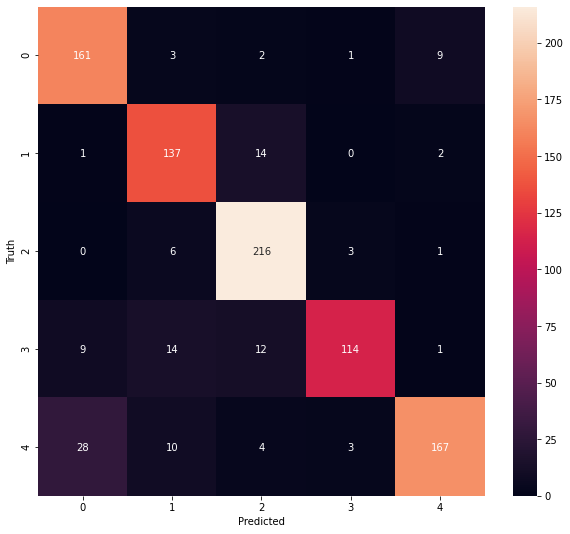

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       176
           1       0.81      0.89      0.85       154
           2       0.87      0.96      0.91       226
           3       0.94      0.76      0.84       150
           4       0.93      0.79      0.85       212

    accuracy                           0.87       918
   macro avg       0.87      0.86      0.86       918
weighted avg       0.87      0.87      0.87       918

